### Selecciona un dataset del [repositorio de la UCI](http://archive.ics.uci.edu/ml/), define una tarea de clasificación binaria y realiza el mismo proceso que en las Notas correspondientes.

### Prueba varias estructuras de redes y compara el desempeño en TEST con alguno de los métodos usados en las Notas 02B 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
cancer = np.loadtxt("data/datasetCancer.csv", delimiter=";")
datos = cancer[:,:10]
clase = cancer[:,10]
print(cancer.shape)
print(datos.shape,datos)
print(clase.shape,clase)

for tipoCancer in np.unique(clase):
    print ("Cancer ", tipoCancer, "n=", np.sum(clase==tipoCancer))
clase[clase==2]=1
clase[clase==4]=-1
print ("--")
print (np.mean(datos, axis=0) )   
print (np.std(datos, axis=0)  )  
print ("min datos", np.min(datos, axis=0))
print ("max datos", np.max(datos, axis=0))


from sklearn.preprocessing import scale, MinMaxScaler 

print ("--")
datos = MinMaxScaler().fit_transform(datos)
print ("min max datos columns")
print (np.min(datos, axis=0), np.max(datos, axis=0))

(699, 11)
(699, 10) [[  1.00002500e+06   5.00000000e+00   1.00000000e+00 ...,   3.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  1.00294500e+06   5.00000000e+00   4.00000000e+00 ...,   3.00000000e+00
    2.00000000e+00   1.00000000e+00]
 [  1.01542500e+06   3.00000000e+00   1.00000000e+00 ...,   3.00000000e+00
    1.00000000e+00   1.00000000e+00]
 ..., 
 [  8.88820000e+05   5.00000000e+00   1.00000000e+01 ...,   8.00000000e+00
    1.00000000e+01   2.00000000e+00]
 [  8.97471000e+05   4.00000000e+00   8.00000000e+00 ...,   1.00000000e+01
    6.00000000e+00   1.00000000e+00]
 [  8.97471000e+05   4.00000000e+00   8.00000000e+00 ...,   1.00000000e+01
    4.00000000e+00   1.00000000e+00]]
(699,) [ 2.  2.  2.  2.  2.  4.  2.  2.  2.  2.  2.  2.  4.  2.  4.  4.  2.  2.
  4.  2.  4.  4.  2.  4.  2.  4.  2.  2.  2.  2.  2.  2.  4.  2.  2.  2.
  4.  2.  4.  4.  2.  4.  4.  4.  4.  2.  4.  2.  2.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  2.  4.  4.  2.  4.  2.  4.  4.  2.  2.  4.
 

In [90]:
# Definimos y entrenamos una red con dos capas intermedias y una neurona de salida
from sklearn import cross_validation
import neurolab as nl

limits = np.vstack((np.min(datos)*np.ones(datos.shape[1]), np.max(datos)*np.ones(datos.shape[1]))).T
test_size = 0.6

datos_train, datos_test, clase_train, clase_test = cross_validation.train_test_split(datos, 
                                                                     clase, 
                                                                     test_size=test_size, 
                                                                     random_state=np.random.randint(1,100))
net = nl.net.newff(limits,[6, 1])
err = net.train(datos_train, clase_train.reshape(len(clase_train), 1), show=5, epochs=100)

Epoch: 5; Error: 16.336438928238714;
Epoch: 10; Error: 9.283869972719568;
Epoch: 15; Error: 6.648954989587514;
Epoch: 20; Error: 2.9300563015825762;
Epoch: 25; Error: 2.0506014729908895;
Epoch: 30; Error: 2.0088762914412164;
Epoch: 35; Error: 2.001539030495024;
Epoch: 40; Error: 1.9997117247902139;
Epoch: 45; Error: 1.9995896890755658;
Epoch: 50; Error: 1.9993304230030637;
Epoch: 55; Error: 1.9903098618804576;
Epoch: 60; Error: 1.9340581224124784;
Epoch: 65; Error: 1.884781203206434;
Epoch: 70; Error: 1.8652521732341236;
Epoch: 75; Error: 1.7215938562528046;
Epoch: 80; Error: 1.6000178126410332;
Epoch: 85; Error: 1.4240283507302587;
Epoch: 90; Error: 1.1509577465259033;
Epoch: 95; Error: 0.15986509358309312;
The goal of learning is reached


Text(0,0.5,'error (default SSE)')

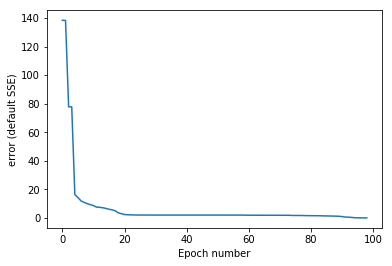

In [91]:
plt.plot(err)
plt.xlabel('Epoch number')
plt.ylabel('error (default SSE)')

In [98]:
# miramos el desempeño en el dataset de TEST
from sklearn.metrics import confusion_matrix
print(datos_test.shape)
pred = net.sim(datos_test)[:,0]
pred[pred<5]=-1
pred[pred>5]=1

cm = confusion_matrix(clase_test, pred)
print (cm)
print ("desempeño en el dataset de TEST: ",np.sum(np.diag(cm))*1./np.sum(cm))

(420, 10)
[[143   0]
 [277   0]]
desempeño en el dataset de TEST:  0.340476190476


In [99]:
# miramos el desempeño en el dataset de TRAIN
pred =  net.sim(datos_train)[:,0]
pred[pred<0]=-1
pred[pred>0]=1

cm = confusion_matrix(clase_train, pred)
print (cm)
print ("desempeño en el dataset de TRAIN: ",np.sum(np.diag(cm))*1./np.sum(cm))

[[ 98   0]
 [  0 181]]
desempeño en el dataset de TRAIN:  1.0


In [94]:
from sklearn.naive_bayes import GaussianNB
g = GaussianNB()
g.fit(datos_train, clase_train)
predicciones_test  = g.predict(datos_test)
cm=confusion_matrix(clase_test, predicciones_test)
print ("acierto en test ", g.score(datos_test, clase_test))
#print (cm)

acierto en test  0.957142857143
[[139   4]
 [ 14 263]]


## Pruebas con varios de los clasificadores de SciKit-Learn

In [96]:
from sklearn import tree
from sklearn.svm import SVC # Supported Vector Classificator
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import numpy as np

#CLASSIFIERS
# using the default values for all the hyperparameters
clf_tree = tree.DecisionTreeClassifier()
clf_SVM = SVC()
clf_Perceptron = Perceptron()
clf_KNN = KNeighborsClassifier()
clf_GNB = GaussianNB()

# Training the models
clf_tree = clf_tree.fit(datos_train, clase_train)
clf_SVM.fit(datos_train, clase_train)
clf_Perceptron.fit(datos_train, clase_train)
clf_KNN.fit(datos_train, clase_train)
clf_GNB.fit(datos_train, clase_train)

# Testing using the same data
pred_tree = clf_tree.predict(datos_test)
acc_tree = accuracy_score(clase_test, pred_tree) * 100
print('Accuracy for DecisionTree: {}'.format(acc_tree))

pred_svm = clf_SVM.predict(datos_test)
acc_svm = accuracy_score(clase_test, pred_svm) * 100
print('Accuracy for SVM: {}'.format(acc_svm))

pred_per = clf_Perceptron.predict(datos_test)
acc_per = accuracy_score(clase_test, pred_per) * 100
print('Accuracy for perceptron: {}'.format(acc_per))

pred_KNN = clf_KNN.predict(datos_test)
acc_KNN = accuracy_score(clase_test, pred_KNN) * 100
print('Accuracy for KNN: {}'.format(acc_KNN))

pred_GNB = clf_GNB.predict(datos_test)
acc_GNB = accuracy_score(clase_test, pred_GNB) * 100
print('Accuracy for GNB: {}'.format(acc_GNB))

# The best classifier from svm, per, KNN
index = np.argmax([acc_svm, acc_per, acc_KNN, acc_GNB])
classifiers = {0: 'SVM', 1: 'Perceptron', 2: 'KNN', 3: 'GNB'}
print('Best gender classifier is {}'.format(classifiers[index]))

Accuracy for DecisionTree: 91.42857142857143
Accuracy for SVM: 95.95238095238095
Accuracy for perceptron: 96.9047619047619
Accuracy for KNN: 95.71428571428572
Accuracy for GNB: 95.71428571428572
Best gender classifier is Perceptron


C:\Users\Juan Pulido\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
